In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

import time

# used to supress display of warnings
import warnings

# ols library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# import zscore for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# pre-processing methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn.pipeline import Pipeline

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

# bootstrap sampling
from sklearn.utils import resample



In [2]:
concrete_df = pd.read_csv("D:\COS40007\Portfolio 1\concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
concrete_df.shape

(1030, 9)

In [4]:
concrete_df.dtypes


cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
concrete_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_df.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
concrete_df.duplicated().sum()


25

In [8]:
# View the duplicate records
duplicates = concrete_df.duplicated()

concrete_df[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [9]:
# Delete duplicate rows
concrete_df.drop_duplicates(inplace=True)

In [10]:
# Get the shape of Concrete data
concrete_df.shape

(1005, 9)

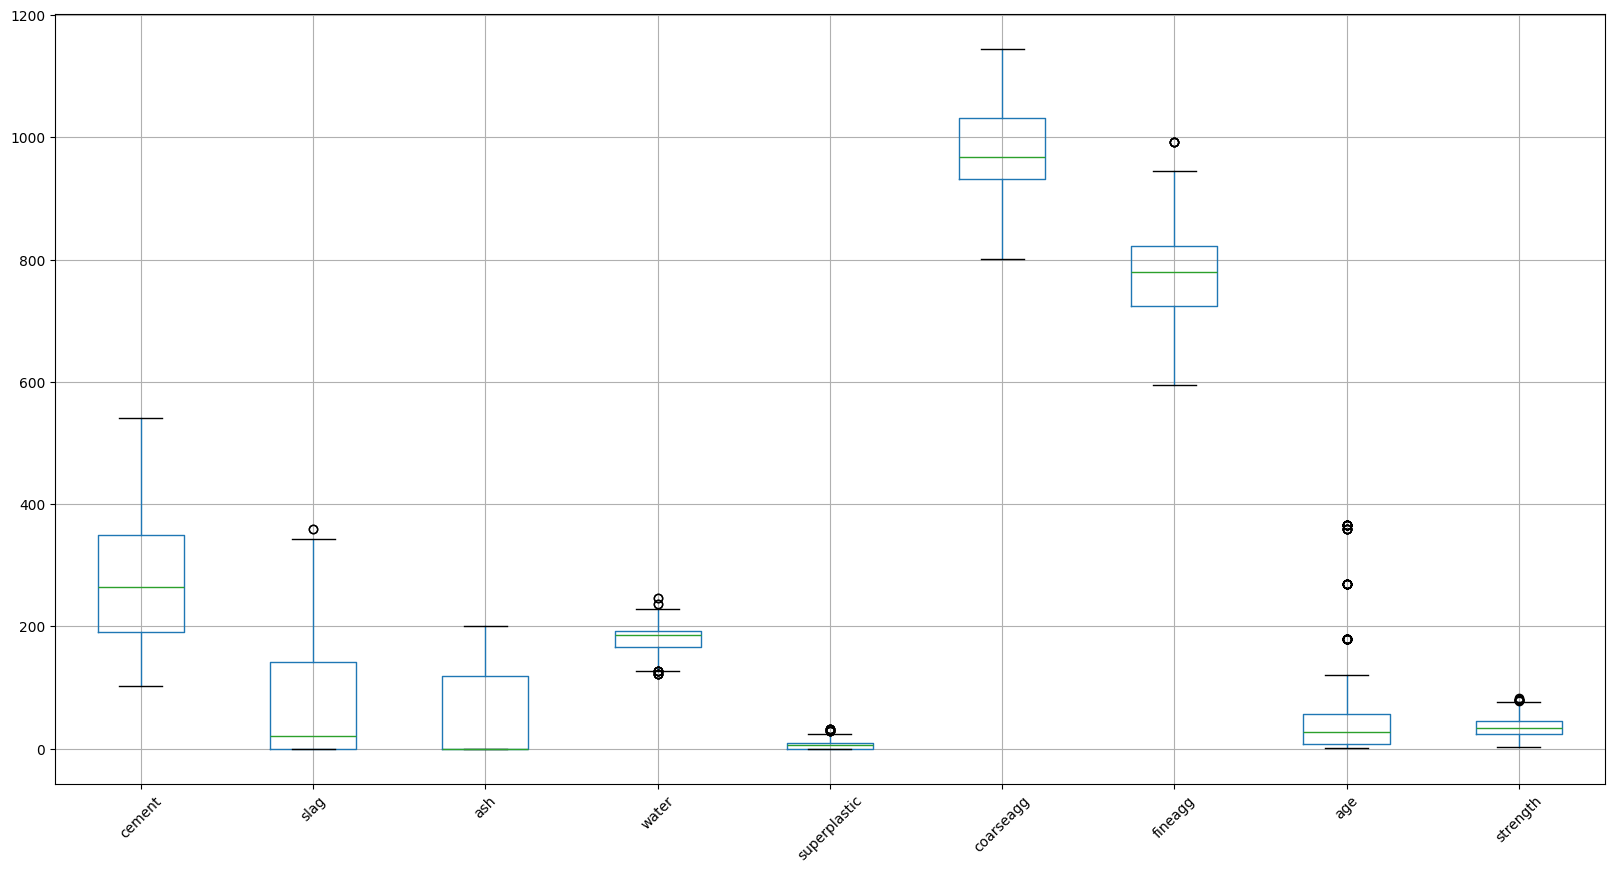

In [11]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

In [12]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [13]:
concrete_df.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [14]:
# IQR score to filter out the outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for 'water', 'superplastic', 
# 'fineagg', 'age' and 'strength' columns
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
    
# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

C:\Users\PC\AppData\Local\Temp\ipykernel_2972\1647637081.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  concrete_df_outliers.iloc[i,j] = whisker[j]
C:\Users\PC\AppData\Local\Temp\ipykernel_2972\1647637081.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  concrete_df_outliers.iloc[i,j] = whisker[j]
C:\Users\PC\AppData\Local\Temp\ipykernel_2972\1647637081.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  concrete_df_outliers.iloc[i,j]

In [15]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'
concrete_df.drop(columns = concrete_df.loc[:,], inplace = True)

In [16]:
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis = 1)

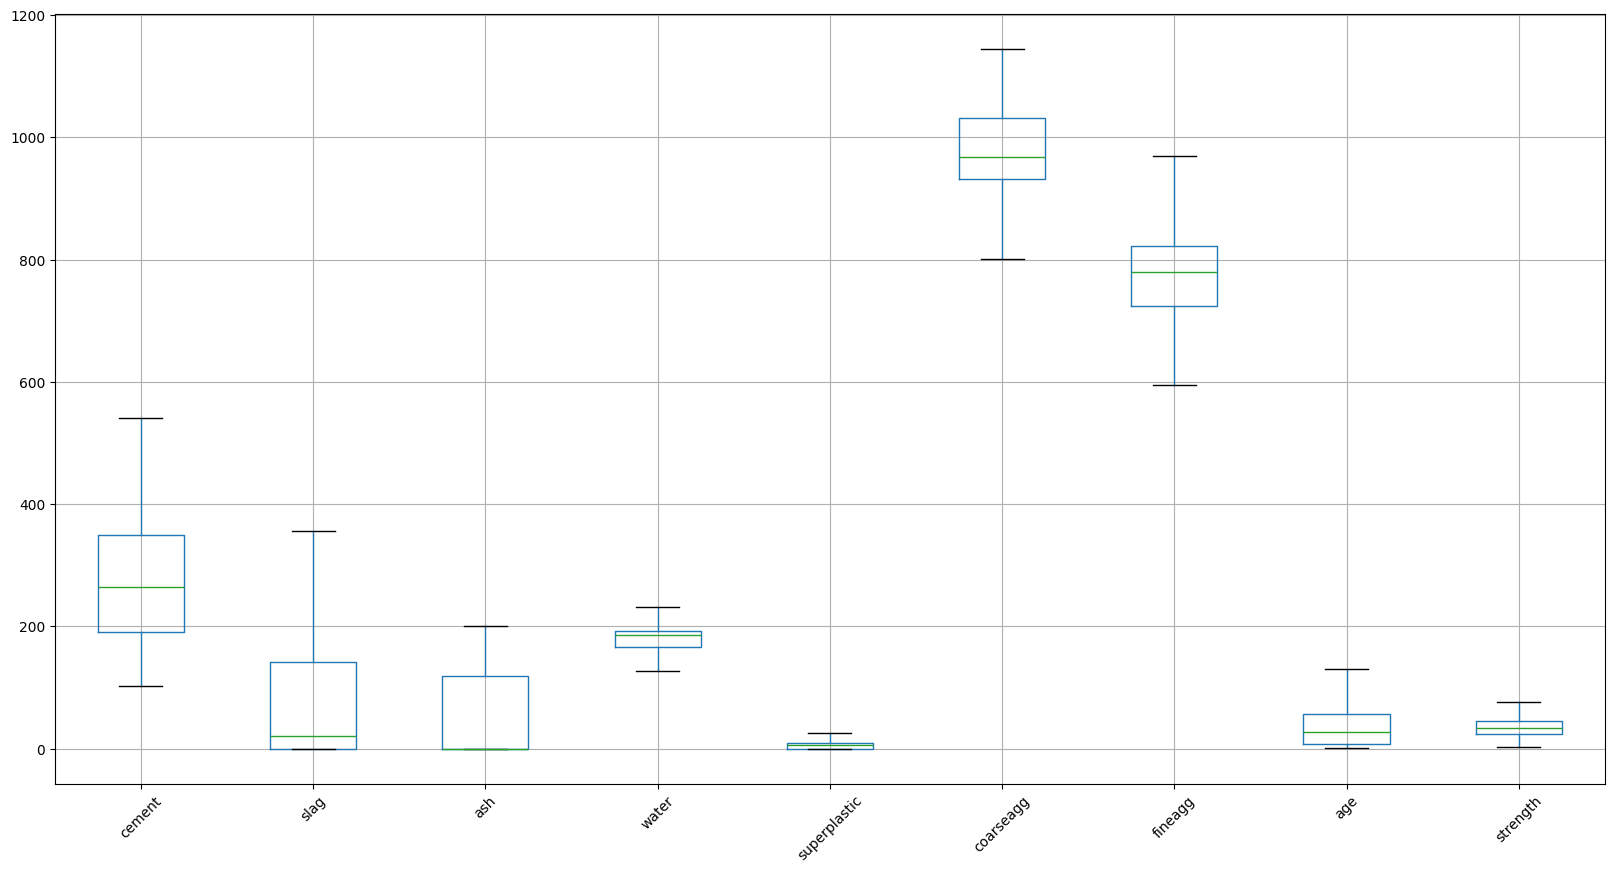

In [17]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

Checking missing values

In [18]:
# Check the presence of missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [19]:
# Check the presence of missing values
concrete_df_missval = concrete_df.copy()   # Make a copy of the dataframe
isduplicates = False

for x in concrete_df_missval.columns:
    concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
    result = concrete_df_missval[x].astype(str).str.isalnum() # Check whether all characters are alphanumeric
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
        print('\n')
        
if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


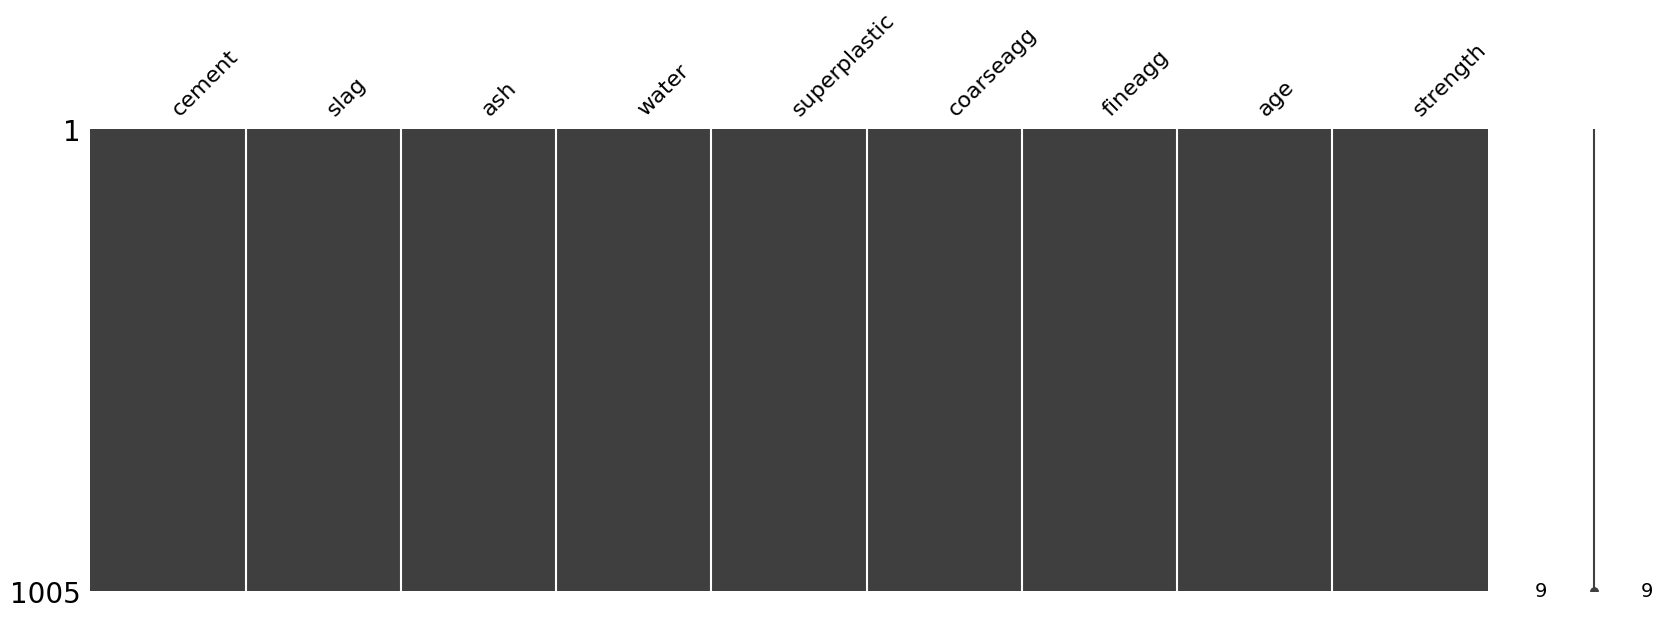

In [20]:
# Visualize missing values
mno.matrix(concrete_df, figsize = (20, 6));


In [21]:
# Summary statistics
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.000
slag,1005.0,72.037214,86.149994,0.00,0.00,20.0,142.50,356.250
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.100
water,1005.0,182.066816,21.158645,127.15,166.60,185.7,192.90,232.350
superplastic,1005.0,5.981493,5.724463,0.00,0.00,6.1,10.00,25.000
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.000
fineagg,1005.0,772.571095,80.035934,594.00,724.30,780.0,822.20,969.050
age,1005.0,38.076119,35.862549,1.00,7.00,28.0,56.00,129.500
strength,1005.0,35.226318,16.220253,2.33,23.52,33.8,44.87,76.895


C:\Users\PC\AppData\Local\Temp\ipykernel_2972\4275139315.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(concrete_df[i],color=k,rug=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_2972\4275139315.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(concrete_df[i],color=k,rug=True)
C:

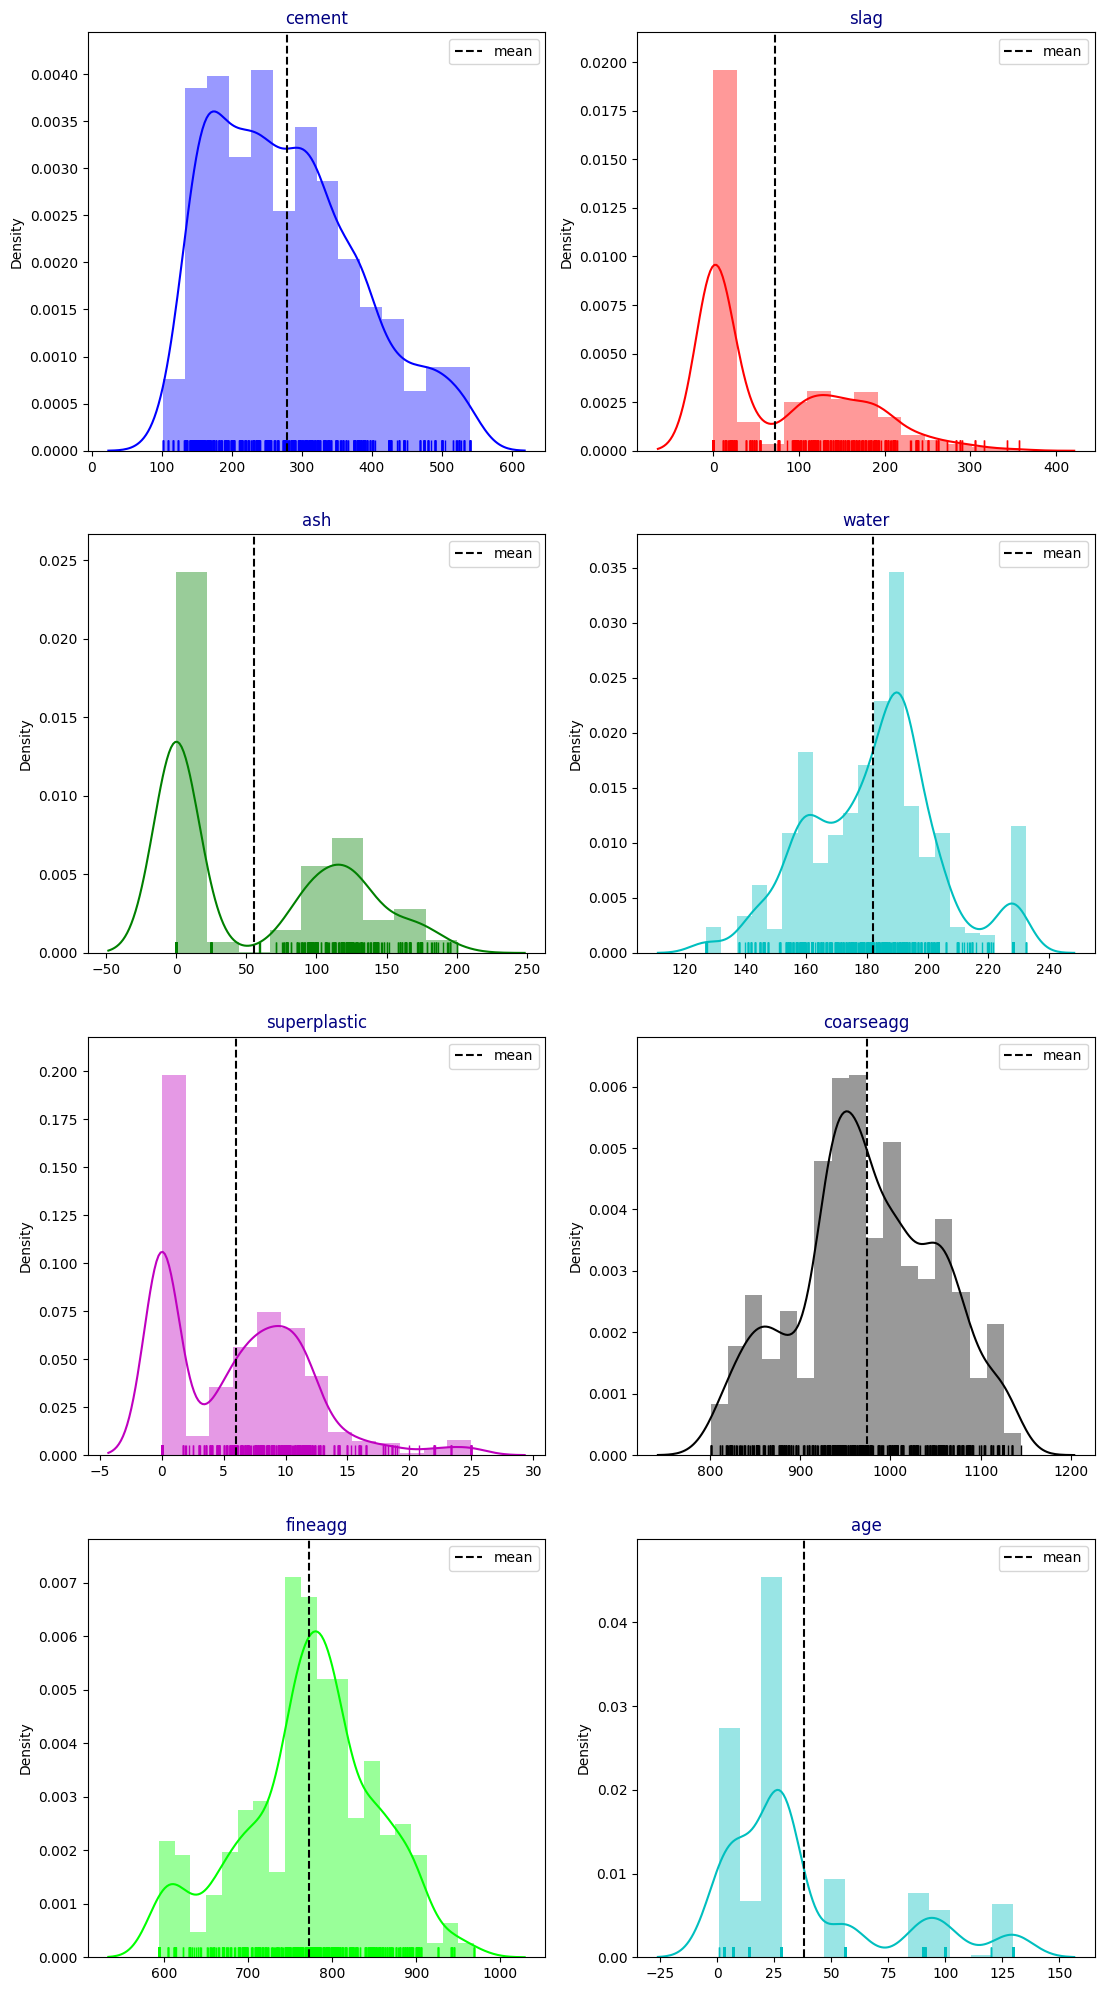

In [22]:
cols = [i for i in concrete_df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

C:\Users\PC\AppData\Local\Temp\ipykernel_2972\4129325777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete_df["strength"],color="b",rug=True)


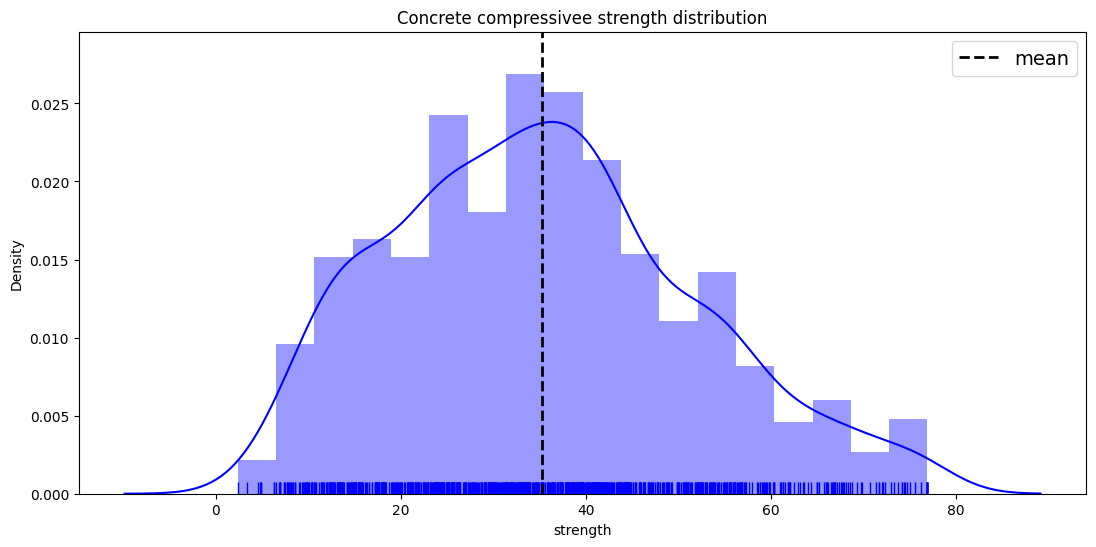

In [23]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["strength"],color="b",rug=True)
plt.axvline(concrete_df["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete compressivee strength distribution")
plt.show()

In [24]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.000
slag,1005.0,72.037214,86.149994,0.00,0.00,20.0,142.50,356.250
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.100
water,1005.0,182.066816,21.158645,127.15,166.60,185.7,192.90,232.350
superplastic,1005.0,5.981493,5.724463,0.00,0.00,6.1,10.00,25.000
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.000
fineagg,1005.0,772.571095,80.035934,594.00,724.30,780.0,822.20,969.050
age,1005.0,38.076119,35.862549,1.00,7.00,28.0,56.00,129.500
strength,1005.0,35.226318,16.220253,2.33,23.52,33.8,44.87,76.895


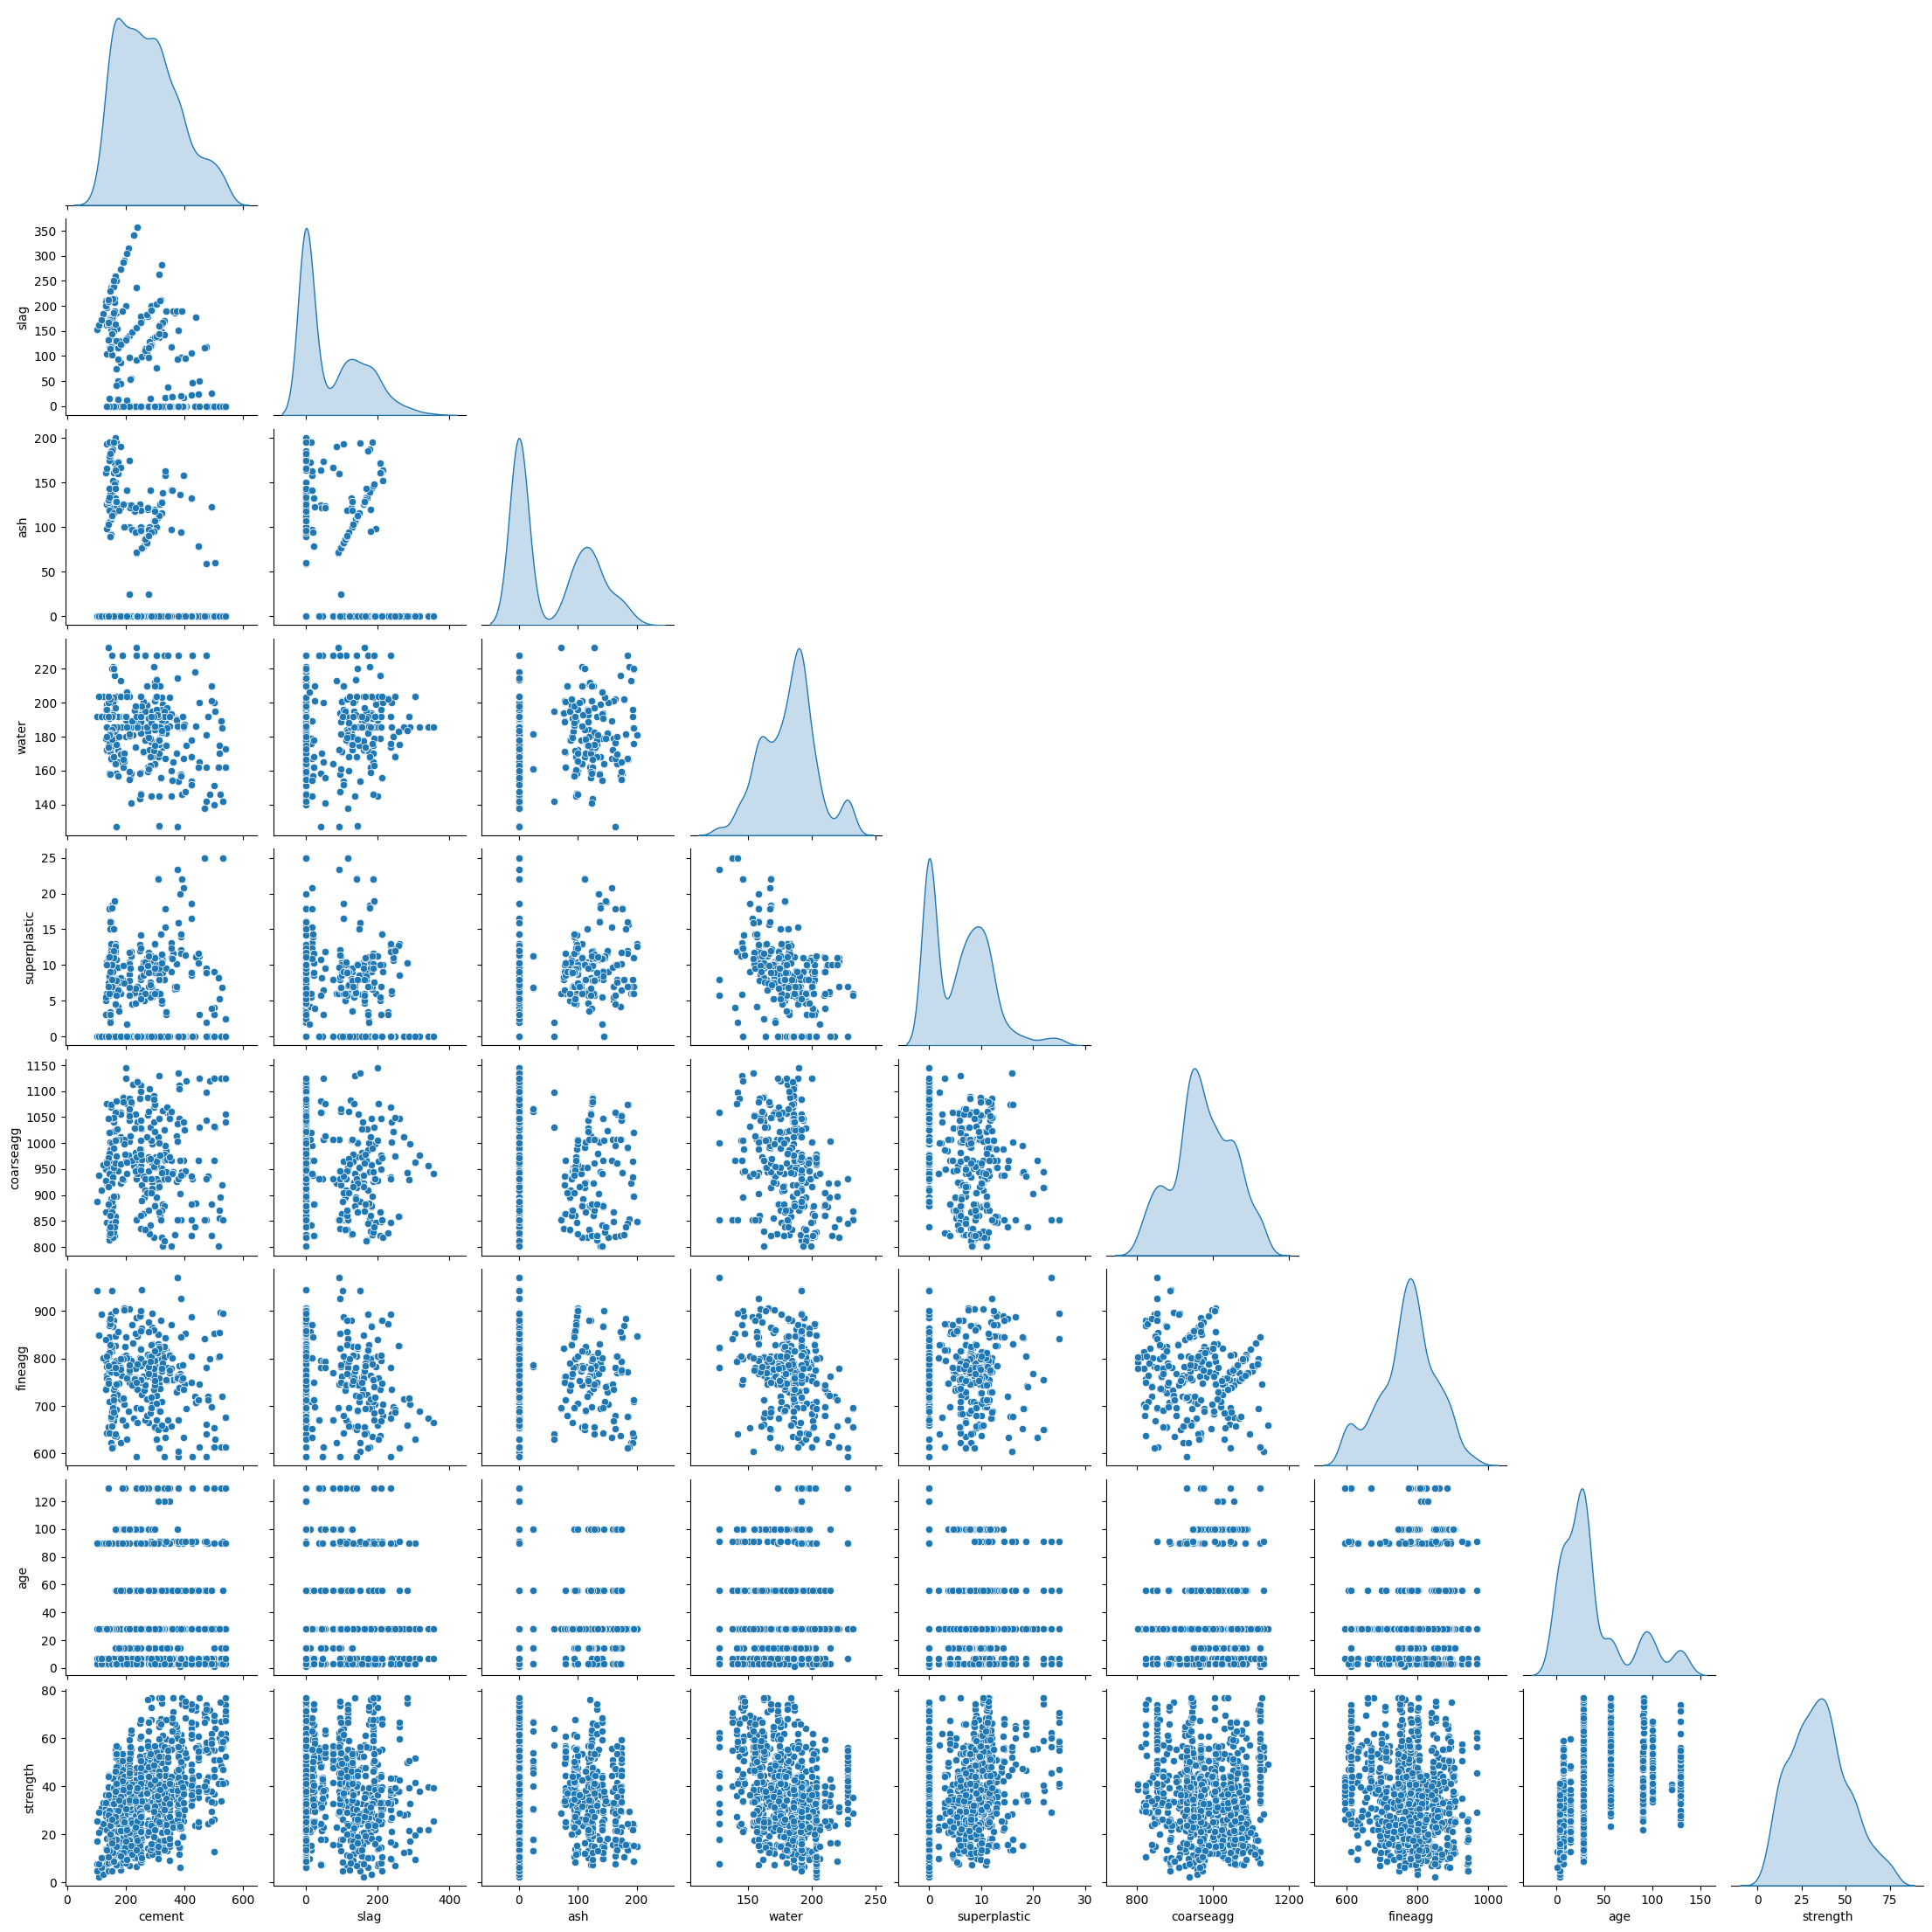

In [25]:
sns.pairplot(concrete_df, diag_kind = 'kde', corner = True);

In [26]:
# Check the Correlation
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,0.488690
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.102440
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.079685
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,-0.271381
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.342983
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.145794
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.188509
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.476726
strength,0.488690,0.102440,-0.079685,-0.271381,0.342983,-0.145794,-0.188509,0.476726,1.000000


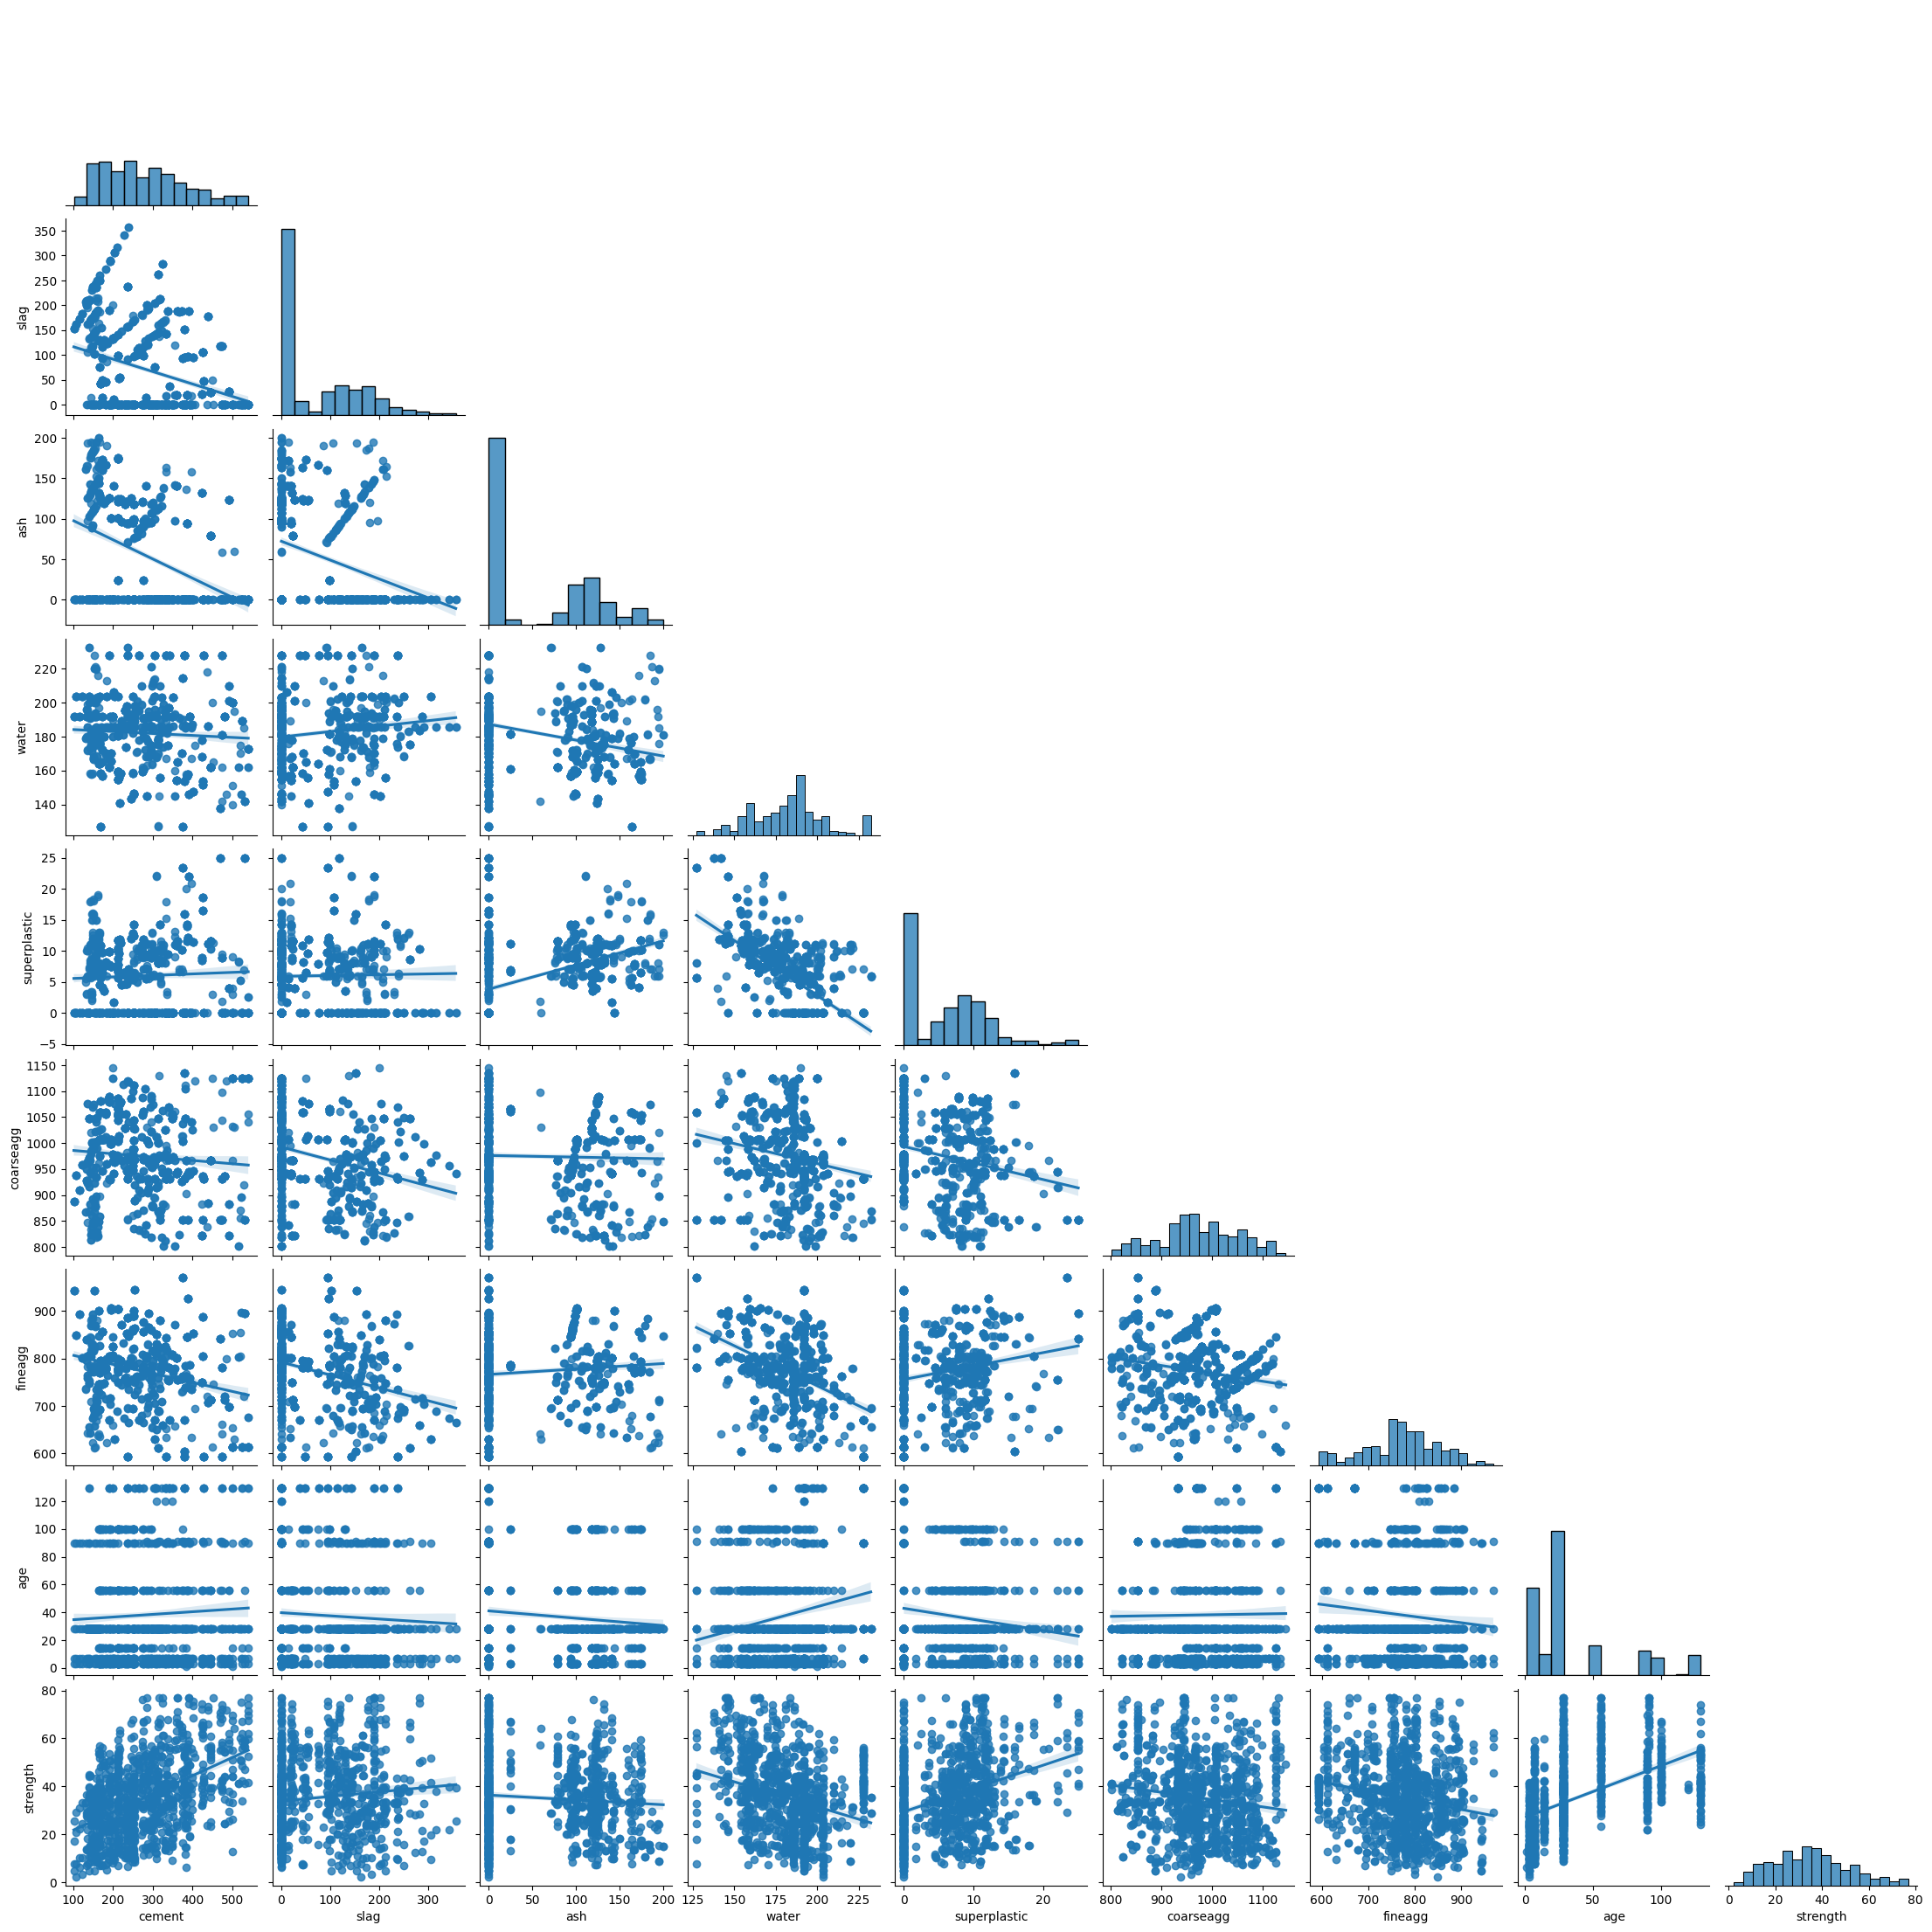

In [27]:
sns.pairplot(concrete_df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']], kind = 'reg', corner = True);

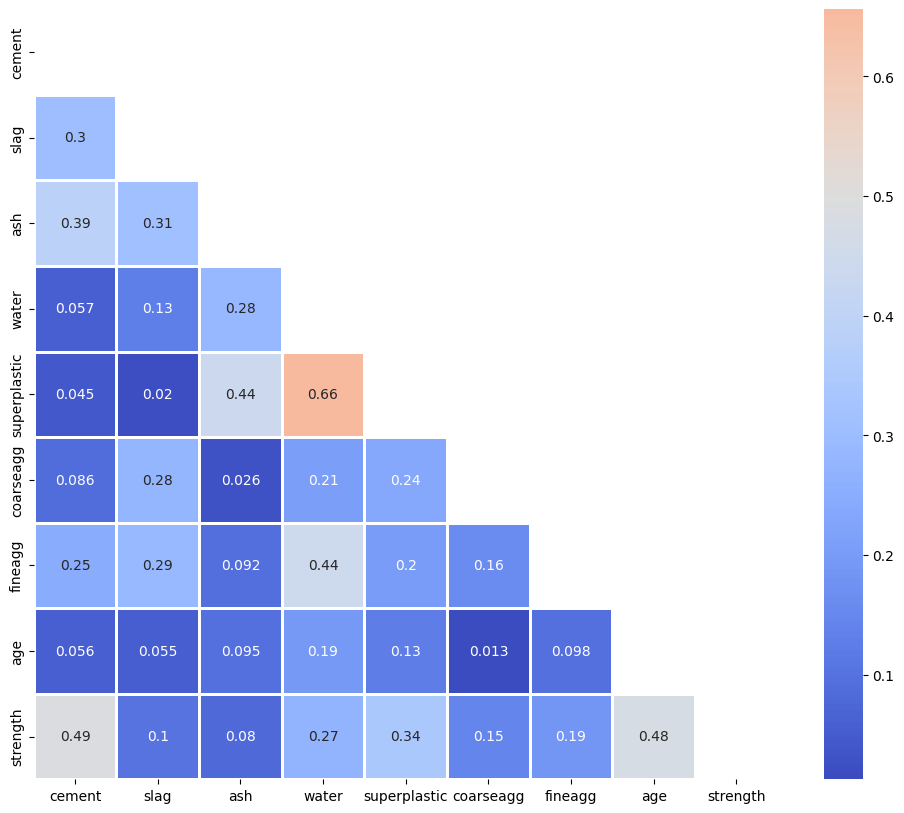

In [28]:
corr = abs(concrete_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

In [29]:
def classify_strength(strength):
    if strength < 20:
        return 1
    elif 20 <= strength < 30:
        return 2
    elif 30 <= strength < 40:
        return 3
    elif 40 <= strength < 50:
        return 4
    else:
        return 5

concrete_df['strength_category'] = concrete_df['strength'].apply(classify_strength)

print(concrete_df.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  strength_category  
0     29.89                  2  
1     23.51                  2  
2     29.22                  2  
3     45.85                  4  
4     18.29                  1  


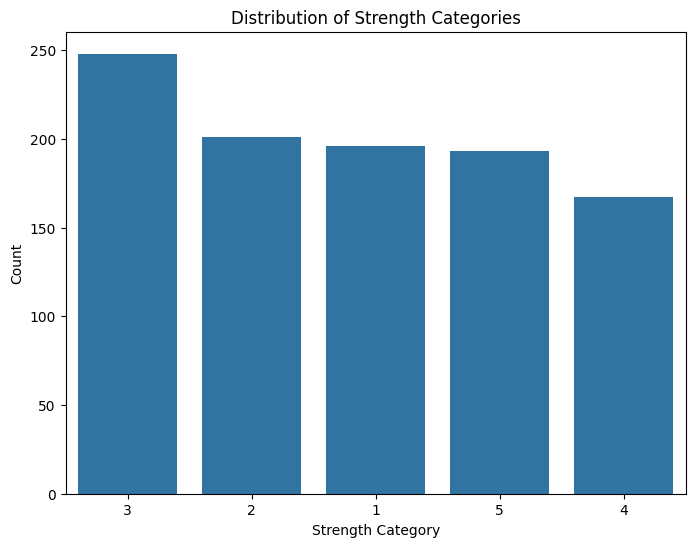

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=concrete_df, x='strength_category', order=concrete_df['strength_category'].value_counts().index)
plt.title('Distribution of Strength Categories')
plt.xlabel('Strength Category')
plt.ylabel('Count')
plt.show()

In [31]:
print("Unique age values:", concrete_df['age'].unique())
print("Number of unique age values:", concrete_df['age'].nunique())
print("Value counts for age:", concrete_df['age'].value_counts().sort_index())

Unique age values: [ 28.   14.   90.    7.   56.    3.  100.   91.  129.5 120.    1. ]
Number of unique age values: 11
Value counts for age: age
1.0        2
3.0      129
7.0      122
14.0      62
28.0     419
56.0      86
90.0      54
91.0      17
100.0     52
120.0      3
129.5     59
Name: count, dtype: int64


In [32]:
# Create a mapping from unique age values to categories (1, 2, 3, ...)
unique_ages = sorted(concrete_df['age'].unique())
age_category_map = {age: i + 1 for i, age in enumerate(unique_ages)}

# Create the new categorical column
concrete_df['age_category'] = concrete_df['age'].map(age_category_map)

display(concrete_df.head())
display(concrete_df['age_category'].value_counts().sort_index())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_category,age_category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,2,5
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,2,4
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,2,5
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,4,5
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1,5


age_category
1       2
2     129
3     122
4      62
5     419
6      86
7      54
8      17
9      52
10      3
11     59
Name: count, dtype: int64

In [33]:
features_to_normalize = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']

In [34]:
scaler = MinMaxScaler()
concrete_df[features_to_normalize] = scaler.fit_transform(concrete_df[features_to_normalize])

display(concrete_df.head())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_category,age_category
0,0.089726,0.595088,0.000000,0.725760,0.000,0.496512,0.411945,28.0,29.89,2,5
1,0.152740,0.118456,0.621189,0.296103,0.432,0.813372,0.539128,14.0,23.51,2,4
2,0.337900,0.000000,0.478261,0.572719,0.220,0.453198,0.712438,28.0,29.22,2,5
3,0.374429,0.320000,0.000000,0.958650,0.000,0.380814,0.202640,28.0,45.85,4,5
4,0.120548,0.514807,0.000000,0.628802,0.364,0.716279,0.273830,28.0,18.29,1,5


In [35]:
features_to_save = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_category']
df_to_save = concrete_df[features_to_save]

df_to_save.to_csv('normalised_concrete.csv', index=False)
print("DataFrame saved as normalised_concrete.csv")

DataFrame saved as normalised_concrete.csv


In [36]:
# Calculate the statistical covariance between pairs of features
cement_slag_cov = concrete_df['cement'].cov(concrete_df['slag'])
cement_ash_cov = concrete_df['cement'].cov(concrete_df['ash'])
water_fineagg_cov = concrete_df['water'].cov(concrete_df['fineagg'])
ash_superplastic_cov = concrete_df['ash'].cov(concrete_df['superplastic'])


# Add the calculated values as new columns (covariance values will be repeated for all rows)
concrete_df['cement+slag'] = cement_slag_cov
concrete_df['cement+ash'] = cement_ash_cov
concrete_df['water+fineagg'] = water_fineagg_cov
concrete_df['ash+superplastic'] = ash_superplastic_cov

display(concrete_df.head())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_category,age_category,cement+slag,cement+ash,water+fineagg,ash+superplastic
0,0.089726,0.595088,0.000000,0.725760,0.000,0.496512,0.411945,28.0,29.89,2,5,-0.017477,-0.029477,-0.019065,0.032048
1,0.152740,0.118456,0.621189,0.296103,0.432,0.813372,0.539128,14.0,23.51,2,4,-0.017477,-0.029477,-0.019065,0.032048
2,0.337900,0.000000,0.478261,0.572719,0.220,0.453198,0.712438,28.0,29.22,2,5,-0.017477,-0.029477,-0.019065,0.032048
3,0.374429,0.320000,0.000000,0.958650,0.000,0.380814,0.202640,28.0,45.85,4,5,-0.017477,-0.029477,-0.019065,0.032048
4,0.120548,0.514807,0.000000,0.628802,0.364,0.716279,0.273830,28.0,18.29,1,5,-0.017477,-0.029477,-0.019065,0.032048


In [37]:
features_to_save_final = [
    'cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg',
    'age_category', 'cement+slag', 'cement+ash', 'water+fineagg', 'ash+superplastic',
    'strength_category'
]

df_final = concrete_df[features_to_save_final]

df_final.to_csv('features_concrete.csv', index=False)

print("DataFrame saved as features_concrete.csv with the selected 13 features.")

DataFrame saved as features_concrete.csv with the selected 13 features.


In [38]:
# Load the dataset
df = pd.read_csv('features_concrete.csv')

# Separate features (X) and target (y)
X = df.drop('strength_category', axis=1)
y = df['strength_category']

In [39]:
# Identify numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define feature sets for five different models
feature_sets = [
    ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_category'],
    ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_category', 'cement+slag', 'cement+ash'],
    ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_category', 'water+fineagg', 'ash+superplastic'],
    ['cement+slag', 'cement+ash', 'water+fineagg', 'ash+superplastic', 'age_category'],
    ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age_category', 'cement+slag', 'cement+ash', 'water+fineagg', 'ash+superplastic']
]


In [41]:
# Store model results
results = []

# Train and evaluate models
for i, features in enumerate(feature_sets):
    model = DecisionTreeClassifier(random_state=1)
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': f'Model {i+1}', 'Features': ', '.join(features), 'Accuracy': accuracy})

In [42]:
# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

     Model                                           Features  Accuracy
0  Model 1  cement, slag, ash, water, superplastic, coarse...  0.681592
1  Model 2  cement, slag, ash, water, superplastic, coarse...  0.681592
2  Model 3  cement, slag, ash, water, superplastic, coarse...  0.681592
3  Model 4  cement+slag, cement+ash, water+fineagg, ash+su...  0.378109
4  Model 5  cement, slag, ash, water, superplastic, coarse...  0.681592
